In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

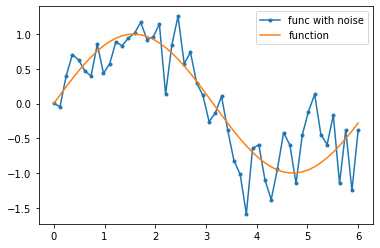

In [3]:
x_data = np.linspace(0, 6, num=50)
y_func = np.sin(x_data)
y_data = y_func + np.random.randn(50) / 3

plt.plot(x_data, y_data, '.-', label='func with noise')
plt.plot(x_data, y_func, label='function')
plt.legend()
plt.show()

## Underfitting Example

In [4]:
def zip_sort(x, y): # Dont worry abt this (Just for plotting purposes)
    x_s = np.sort(x.flatten())
    arg = np.argsort(x.flatten())
    y_s = y[arg]
    return x_s, y_s # x_s.reshape(x.shape), y_s.reshape(y.shape)

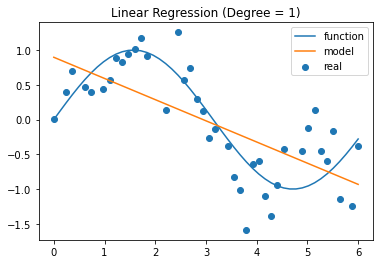

In [5]:
from sklearn import preprocessing, linear_model, metrics
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)
x_train = x_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)

model = linear_model.LinearRegression()
model.fit(x_train, y_train.reshape(-1, 1))
y_hat_train = model.predict(x_train)

plt.scatter(x_train, y_train, label='real')
plt.plot(x_data, y_func, label='function')

x_train_s, y_hat_train_s = zip_sort(x_train, y_hat_train)
plt.plot(x_train_s, y_hat_train_s, label='model')
plt.title('Linear Regression (Degree = 1)')
plt.legend()
plt.show()

## Overfitting Example

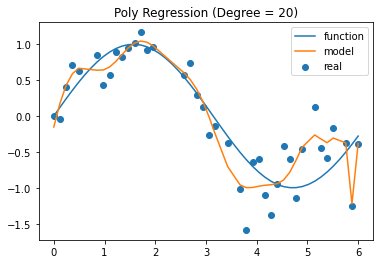

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)
x_train = x_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)

x_train_poly = preprocessing.PolynomialFeatures(18).fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(x_train_poly, y_train.reshape(-1, 1))
y_hat_train = model.predict(x_train_poly)

plt.scatter(x_train, y_train, label='real')
plt.plot(x_data, y_func, label='function')

x_train_s, y_hat_train_s = zip_sort(x_train, y_hat_train)
plt.plot(x_train_s, y_hat_train_s, label='model')
plt.title('Poly Regression (Degree = 20)') # 18 not 20
plt.legend()
plt.show()

### Seems good but how abt on Val data?

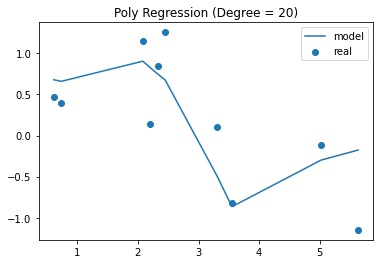

MSE: 0.23306610841121236


In [10]:
x_val_poly = preprocessing.PolynomialFeatures(18).fit_transform(x_val)
y_hat_val = model.predict(x_val_poly)

plt.scatter(x_val, y_val, label='real')

x_val_s, y_hat_val_s = zip_sort(x_val, y_hat_val)
plt.plot(x_val_s, y_hat_val_s, label='model')
plt.title('Poly Regression (Degree = 20)')
plt.legend()
plt.show()

print('MSE:', metrics.mean_squared_error(y_val, y_hat_val))

## How to fix

##### Hint: Use different model or change hyperparameters (will go further later)

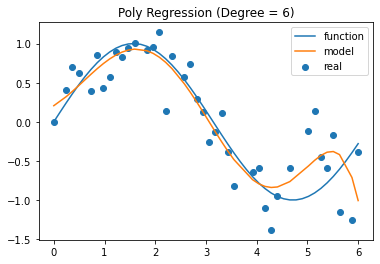

In [11]:
x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.2, shuffle=True)
x_train = x_train.reshape(-1, 1)
x_val = x_val.reshape(-1, 1)

x_train_poly = preprocessing.PolynomialFeatures(6).fit_transform(x_train)
model = linear_model.LinearRegression()
model.fit(x_train_poly, y_train.reshape(-1, 1))
y_hat_train = model.predict(x_train_poly)

plt.scatter(x_train, y_train, label='real')
plt.plot(x_data, y_func, label='function')

x_train_s, y_hat_train_s = zip_sort(x_train, y_hat_train)
plt.plot(x_train_s, y_hat_train_s, label='model')
plt.title('Poly Regression (Degree = 6)')
plt.legend()
plt.show()

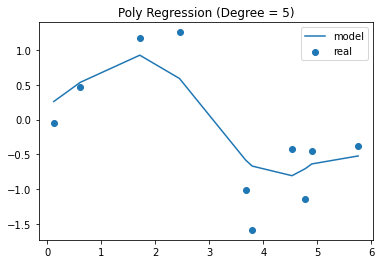

MSE: 0.20311465926209776


In [12]:
x_val_poly = preprocessing.PolynomialFeatures(6).fit_transform(x_val)
y_hat_val = model.predict(x_val_poly)

plt.scatter(x_val, y_val, label='real')

x_val_s, y_hat_val_s = zip_sort(x_val, y_hat_val)
plt.plot(x_val_s, y_hat_val_s, label='model')
plt.title('Poly Regression (Degree = 5)')
plt.legend()
plt.show()

print('MSE:', metrics.mean_squared_error(y_val, y_hat_val))

![title](../../../QR_codes/Code-GA-5.png)